In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets.mnist import load_data
from keras import models, layers
from matplotlib import pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [7]:
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [8]:
input_shape = (28, 28, 1)
num_labels = 10

In [9]:
y_train = tf.one_hot(indices=y_train, depth=num_labels)
y_test = tf.one_hot(indices=y_test, depth=num_labels)

In [14]:
train_val_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_val_ds.take(45000).batch(100)
val_ds = train_val_ds.skip(45000).take(15000).batch(100)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(100)

In [15]:
model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(16, 3, activation='relu'),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_labels),
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                      

In [17]:
model.compile(
    optimizer=tf.keras.optimizers.AdamW(),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [18]:
EPOCHS = 20

In [19]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2),
)

Epoch 1/20
450/450 [==============================] - 51s 106ms/step - loss: 0.9823 - accuracy: 0.8038 - val_loss: 0.1135 - val_accuracy: 0.9663
Epoch 2/20
450/450 [==============================] - 53s 119ms/step - loss: 0.2076 - accuracy: 0.9407 - val_loss: 0.0758 - val_accuracy: 0.9771
Epoch 3/20
450/450 [==============================] - 48s 107ms/step - loss: 0.1396 - accuracy: 0.9590 - val_loss: 0.0761 - val_accuracy: 0.9783
Epoch 4/20
450/450 [==============================] - 50s 111ms/step - loss: 0.1108 - accuracy: 0.9663 - val_loss: 0.0713 - val_accuracy: 0.9804
Epoch 5/20
450/450 [==============================] - 50s 111ms/step - loss: 0.0951 - accuracy: 0.9709 - val_loss: 0.0563 - val_accuracy: 0.9839
Epoch 6/20
450/450 [==============================] - 52s 116ms/step - loss: 0.0831 - accuracy: 0.9752 - val_loss: 0.0606 - val_accuracy: 0.9835
Epoch 7/20
450/450 [==============================] - 53s 117ms/step - loss: 0.0763 - accuracy: 0.9761 - val_loss: 0.0524 - val_ac

In [20]:
metrics = history.history

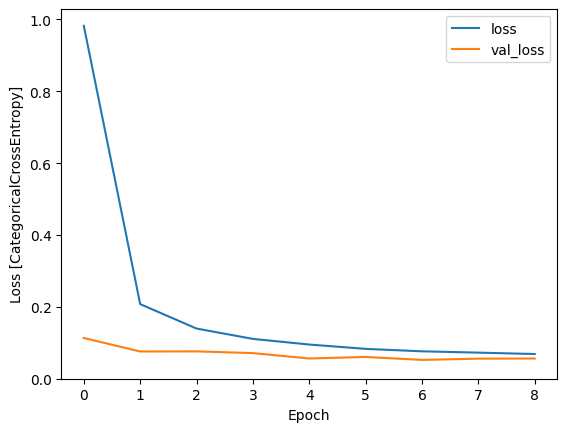

100/100 [==============================] - 2s 17ms/step - loss: 0.0425 - accuracy: 0.9874
{'loss': 0.0424550399184227, 'accuracy': 0.9873999953269958}


In [21]:
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch')
plt.ylabel('Loss [CategoricalCrossEntropy]')
plt.show()

print(model.evaluate(test_ds, return_dict=True))